<a href="https://colab.research.google.com/github/lillanieder/data-projects/blob/main/6_google_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://lazarinastoy.com/the-ultimate-guide-to-pytrends-google-trends-api-with-python/

https://towardsdatascience.com/tracking-keyword-trends-on-google-search-with-pytrends-cf97c43803f6

In [1]:
!pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
from pytrends.request import TrendReq

# Get today's treniding topics

In [3]:
pytrend = TrendReq()

trendingtoday = pytrend.today_searches(pn='HU')
trendingtoday.head(20)

0    /trends/explore?q=Jansen+Panettiere&date=now+7...
1    /trends/explore?q=Guns+N'+Roses&date=now+7-d&g...
2    /trends/explore?q=V%C3%A9d%C5%91olt%C3%A1s&dat...
3       /trends/explore?q=Axl+Rose&date=now+7-d&geo=HU
4    /trends/explore?q=Moln%C3%A1r+Anik%C3%B3&date=...
5    /trends/explore?q=Coconut+Kitty&date=now+7-d&g...
6    /trends/explore?q=F%C3%B6ldreng%C3%A9s+T%C3%B6...
7           /trends/explore?q=Temu&date=now+7-d&geo=HU
8    /trends/explore?q=Poco+X5+Pro&date=now+7-d&geo=HU
Name: exploreLink, dtype: object

# Get Google Top Charts

In [4]:
df = pytrend.top_charts(2020, hl='en-US', tz=300, geo='GLOBAL')
df.head()

,title,exploreQuery
0,Coronavirus,
1,Election results,
2,Kobe Bryant,
3,Zoom,
4,IPL,


# Interest Over Time

Text(0, 0.5, 'Total Count')

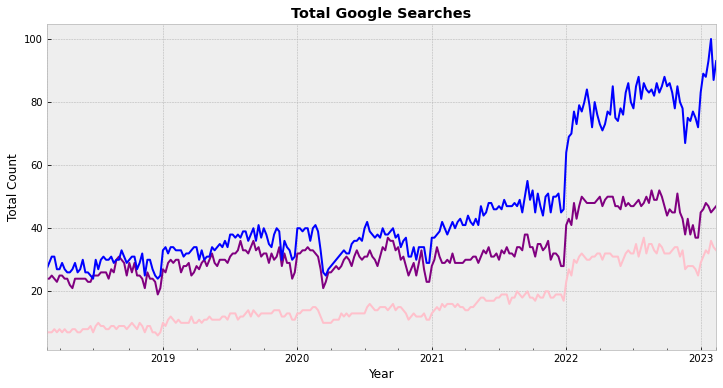

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# connect to google
pytrends = TrendReq(hl='en-US', tz=360)
# keywords to search for
pytrends.build_payload(kw_list=['data scientist', 'data engineer', 'data analyst'])

# dataframe
time_df = pytrends.interest_over_time()

# creating graph
fig, ax = plt.subplots(figsize=(12, 6))
time_df['data scientist'].plot(color='purple')
time_df['data engineer'].plot(color='pink')
time_df['data analyst'].plot(color='blue')
# adding title and labels
plt.title('Total Google Searches', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count')